In [25]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Training points are every 0.1 in [0,1] (note that they're the same for both tasks)
train_x = torch.linspace(0, 1, 11).view(-1, 1)
# y1s are indexed 0, y2s are indexed 1
y1_inds = torch.zeros(11).long()
y2_inds = torch.ones(11).long()
# y1 function is sin(2*pi*x) with noise N(0, 0.04)
train_y1 = torch.sin(train_x.data * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2
# y2 function is cos(2*pi*x) with noise N(0, 0.04)
train_y2 = torch.cos(train_x.data * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2

In [27]:
from torch import optim

In [28]:
train_y = torch.cat((train_y1, train_y2), dim=1).contiguous()
print(train_y)

tensor([[ 0.4425,  0.9615],
        [ 0.4292,  0.9184],
        [ 0.7137,  0.1162],
        [ 0.7799, -0.1786],
        [ 0.4198, -0.7220],
        [ 0.2756, -1.0895],
        [-0.6385, -0.5298],
        [-0.7910, -0.5154],
        [-0.7869,  0.3989],
        [-0.7470,  0.8819],
        [ 0.0485,  1.1315]])


In [29]:
from multitaskgp import ExactMultitaskGP
from kernels import RQ_Constant, RBF

In [30]:
model = ExactMultitaskGP(train_x,train_y, kernel=RBF(), rank=1)

In [31]:
model.fit(lr=0.1, max_epoch=100)

Epoch: 1, Loss: 26.536706924438477
Epoch: 2, Loss: 25.77750015258789
Epoch: 3, Loss: 25.062490463256836
Epoch: 4, Loss: 24.404420852661133
Epoch: 5, Loss: 23.821563720703125
Epoch: 6, Loss: 23.33957290649414
Epoch: 7, Loss: 22.991233825683594
Epoch: 8, Loss: 22.800601959228516
Epoch: 9, Loss: 22.73196029663086
Epoch: 10, Loss: 22.69993782043457
Epoch: 11, Loss: 22.66034698486328
Epoch: 12, Loss: 22.605243682861328
Epoch: 13, Loss: 22.523944854736328
Epoch: 14, Loss: 22.376834869384766
Epoch: 15, Loss: 22.11391258239746
Epoch: 16, Loss: 21.74843978881836
Epoch: 17, Loss: 21.36846923828125
Epoch: 18, Loss: 21.090408325195312
Epoch: 19, Loss: 20.980030059814453
Epoch: 20, Loss: 21.002178192138672
Epoch: 21, Loss: 21.054758071899414
Epoch: 22, Loss: 21.048969268798828
Epoch: 23, Loss: 20.946537017822266
Epoch: 24, Loss: 20.74616241455078
Epoch: 25, Loss: 20.464780807495117
Epoch: 26, Loss: 20.129104614257812
Epoch: 27, Loss: 19.772933959960938
Epoch: 28, Loss: 19.433597564697266
Epoch: 29,

In [20]:
test_x = torch.linspace(0, 1, 51).view(-1, 1)
fmean = model.predict(test_x)[-1]

In [21]:
print(fmean)

tensor(1.00000e-06 *
       [[ 0.0125,  1.2361],
        [ 0.0124,  1.2290],
        [ 0.0123,  1.2216],
        [ 0.0122,  1.2139],
        [ 0.0122,  1.2059],
        [ 0.0121,  1.1976],
        [ 0.0120,  1.1890],
        [ 0.0119,  1.1802],
        [ 0.0118,  1.1711],
        [ 0.0117,  1.1619],
        [ 0.0116,  1.1524],
        [ 0.0115,  1.1427],
        [ 0.0114,  1.1329],
        [ 0.0113,  1.1230],
        [ 0.0112,  1.1129],
        [ 0.0111,  1.1026],
        [ 0.0110,  1.0923],
        [ 0.0109,  1.0819],
        [ 0.0108,  1.0715],
        [ 0.0107,  1.0610],
        [ 0.0106,  1.0504],
        [ 0.0105,  1.0399],
        [ 0.0104,  1.0293],
        [ 0.0103,  1.0187],
        [ 0.0102,  1.0082],
        [ 0.0101,  0.9977],
        [ 0.0100,  0.9873],
        [ 0.0099,  0.9769],
        [ 0.0098,  0.9666],
        [ 0.0096,  0.9563],
        [ 0.0095,  0.9462],
        [ 0.0094,  0.9361],
        [ 0.0093,  0.9262],
        [ 0.0092,  0.9164],
        [ 0.0091,  0.9067],

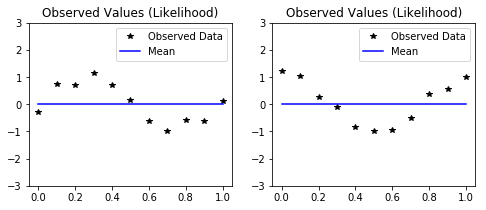

In [22]:
f, (y1_ax, y2_ax) = plt.subplots(1, 2, figsize=(8, 3))
def ax_plot(ax, train_y, rand_var, title):
    # Plot training data as black stars
    ax.plot(train_x.data.numpy(), train_y.data.numpy(), 'k*')
    # Predictive mean as blue line
    ax.plot(test_x.data.numpy(), rand_var.detach().numpy(), 'b')
    # Shade in confidence 
    ax.set_ylim([-3, 3])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])
    ax.set_title(title)
ax_plot(y1_ax, train_y1, fmean[:, 0], 'Observed Values (Likelihood)')
ax_plot(y2_ax, train_y2, fmean[:, 1], 'Observed Values (Likelihood)')

In [23]:
print(model.task_kernel())

tensor(1.00000e-06 *
       [[ 0.0008,  0.0745],
        [ 0.0745,  7.3847]])


In [24]:
print(model.log_noise.exp())

tensor([ 0.4602,  0.6298])
